In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle 

from utils import *

db = EnsembleDatabase(pickle.load(open("ensemble_data.p", "rb")))

0.9150(14)
0.8846(16)


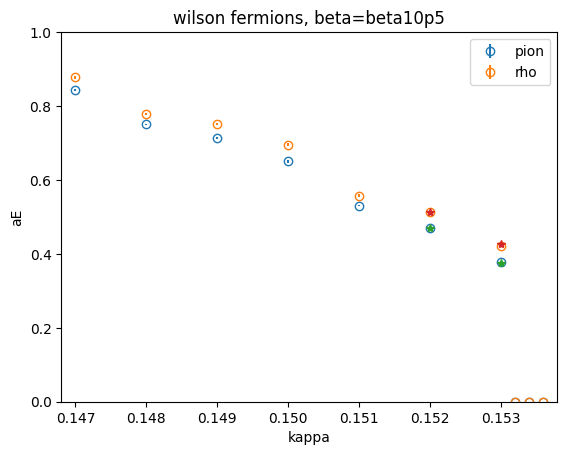

In [16]:
beta="beta10p5"
efm_trajectory(db, beta, "wilson", "efm_G5[t=20]", "efm_G1[t=20]")

plt.ylim(0.0,1.0)
plt.xlim(0.1468,0.1538)

import gvar as gv

beta="beta10p5"
kappas=["k0p1520","k0p1530"]

xvals=[]
pionvals=[]
rhovals=[]
pionerrs=[]
rhoerrs=[]
data=db.filter(beta).filter("wilson").data
for key, value in data.items():
    for k in kappas:
        if k in key:
            ePI = gv.gvar(value['e0_G5']['avg'], value['e0_G5']['err'])
            eRHO1 = gv.gvar(value['e0_G1']['avg'], value['e0_G1']['err'])
            print(ePI/eRHO1)
            xvals.append(float(k[1:].replace("p",".")))
            pionvals.append(ePI.mean)
            pionerrs.append(ePI.sdev)
            rhovals.append(eRHO1.mean)
            rhoerrs.append(eRHO1.sdev)

plt.errorbar(xvals,pionvals,pionerrs,linestyle="None",marker='*',label='fit')
plt.errorbar(xvals,rhovals,rhoerrs,linestyle="None",marker='*',label='fit')

#plt.show()
plt.savefig("mass_trajectory_{}.svg".format(beta))

0.8814(22)
0.8710(23)


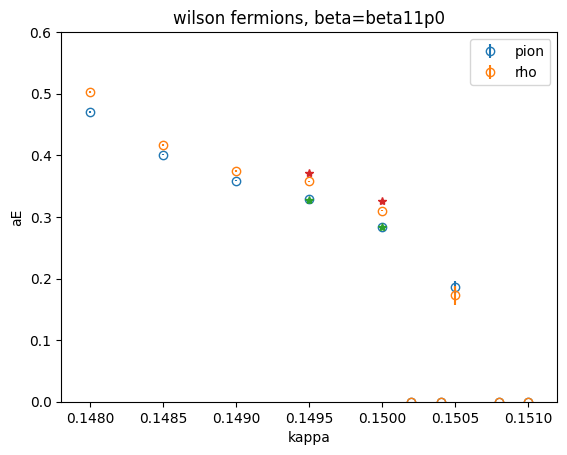

In [17]:
beta="beta11p0"
efm_trajectory(db, beta, "wilson", "efm_G5[t=20]", "efm_G1[t=20]")

plt.ylim(0.0,0.6)
plt.xlim(0.1478,0.1512)

beta="beta11p0"
kappas=["k0p1495","k0p1500"]

xvals=[]
pionvals=[]
rhovals=[]
pionerrs=[]
rhoerrs=[]
data=db.filter(beta).filter("wilson").data
for key, value in data.items():
    for k in kappas:
        if k in key:
            ePI = gv.gvar(value['e0_G5']['avg'], value['e0_G5']['err'])
            eRHO1 = gv.gvar(value['e0_G1']['avg'], value['e0_G1']['err'])
            print(ePI/eRHO1)
            xvals.append(float(k[1:].replace("p",".")))
            pionvals.append(ePI.mean)
            pionerrs.append(ePI.sdev)
            rhovals.append(eRHO1.mean)
            rhoerrs.append(eRHO1.sdev)

plt.errorbar(xvals,pionvals,pionerrs,linestyle="None",marker='*',label='fit')
plt.errorbar(xvals,rhovals,rhoerrs,linestyle="None",marker='*',label='fit')


#plt.show()
plt.savefig("mass_trajectory_{}.svg".format(beta))
# 0.1495 & 0.1500 are high stats & good fits

0.47018(39) 0.51383(64)
0.9150(14)
0.37657(36) 0.42572(65)
0.8846(16)


<ErrorbarContainer object of 3 artists>

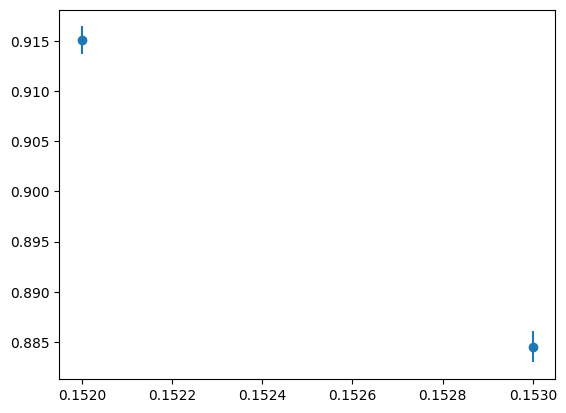

In [13]:
import gvar as gv

beta="beta10p5"
kappas=["k0p1520","k0p1530"]

xvals=[]
yvals=[]
yerrs=[]
data=db.filter(beta).filter("wilson").data
for key, value in data.items():
    for k in kappas:
        if k in key:
            ePI = gv.gvar(value['e0_G5']['avg'], value['e0_G5']['err'])
            eRHO1 = gv.gvar(value['e0_G1']['avg'], value['e0_G1']['err'])
            print(ePI,eRHO1)
            print(ePI/eRHO1)
            xvals.append(float(k[1:].replace("p",".")))
            yvals.append((ePI/eRHO1).mean)
            yerrs.append((ePI/eRHO1).sdev)

plt.errorbar(xvals,yvals,yerrs,linestyle="None",marker='o')

In [6]:
beta="beta11p0"
kappas=["k0p1495","k0p1500"]

data=db.filter(beta).filter("wilson").data
for key, value in data.items():
    for k in kappas:
        if k in key:
            ePI = gv.gvar(value['e0_G5']['avg'], value['e0_G5']['err'])
            eRHO1 = gv.gvar(value['e0_G1']['avg'], value['e0_G1']['err'])
            print(ePI,eRHO1)
            print(ePI/eRHO1)

0.32715(52) 0.37118(70)
0.8814(22)
0.28404(39) 0.32612(73)
0.8710(23)


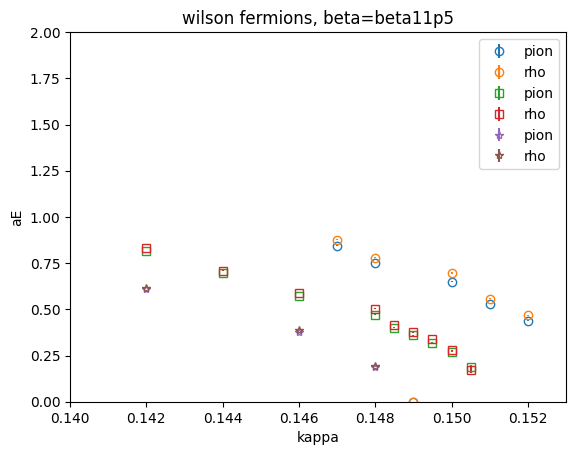

In [8]:
efm_trajectory(db, "beta10p5", "wilson", "efm_G5[t=20]", "efm_G1[t=20]")
efm_trajectory(db, "beta11p0", "wilson", "efm_G5[t=20]", "efm_G1[t=20]", marker='s')
efm_trajectory(db, "beta11p5", "wilson", "efm_G5[t=20]", "efm_G1[t=20]", marker='*')


plt.ylim(0.0,2.0)
plt.xlim(0.14,0.153)

#plt.show()
plt.savefig("mass_trajectory_{}.svg".format("multiple_beta"))

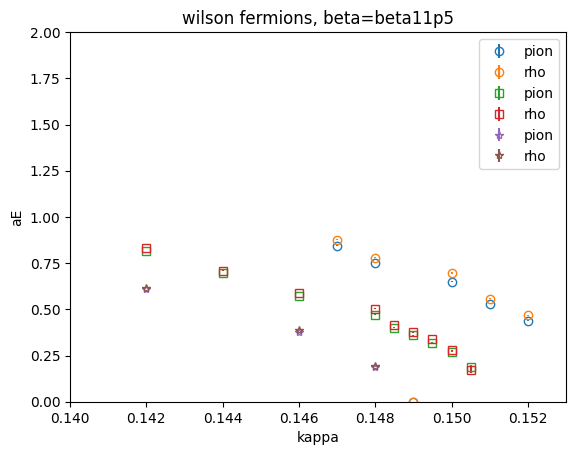

In [9]:
efm_trajectory(db, "beta10p5", "wilson", "efm_G5[t=20]", "efm_G1[t=20]")
efm_trajectory(db, "beta11p0", "wilson", "efm_G5[t=20]", "efm_G1[t=20]", marker='s')
efm_trajectory(db, "beta11p5", "wilson", "efm_G5[t=20]", "efm_G1[t=20]", marker='*')


plt.ylim(0.0,2.0)
plt.xlim(0.14,0.153)

#plt.show()
plt.savefig("mass_trajectory_{}.svg".format("multiple_beta"))

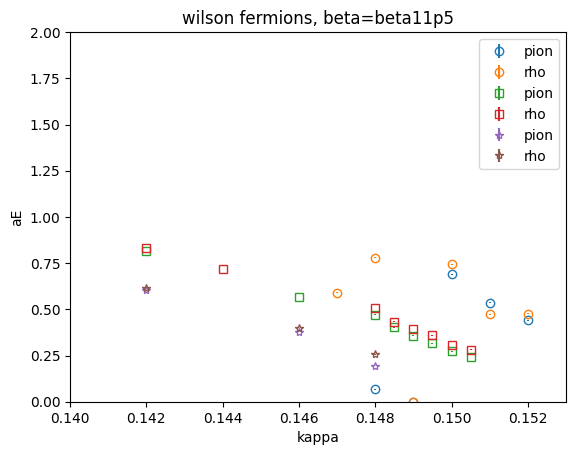

In [14]:
efm_trajectory(db, "beta10p5", "wilson", "e0_G5", "e0_G1")
efm_trajectory(db, "beta11p0", "wilson", "e0_G5", "e0_G1", marker='s')
efm_trajectory(db, "beta11p5", "wilson", "e0_G5", "e0_G1", marker='*')


plt.ylim(0.0,2.0)
plt.xlim(0.14,0.153)

#plt.show()
plt.savefig("mass_trajectory_{}.svg".format("multiple_beta"))

In [17]:
betas=[]
vals=[]
for k,v in db.filter("k0p1480").data.items():
    strTerms=k.split('/')
    beta=float(strTerms[7][4:].replace('p','.'))
    #print(beta,v['fullPlaq'])
    betas.append(beta)
    vals.append(v['fullPlaq']['avg'])#err for err

10.5 {'avg': 0.568516520763819, 'err': 3.3181612327433576e-05}
10.0 {'avg': 0.4652327029781625, 'err': 0.000466832224758576}
11.0 {'avg': 0.5969970596732631, 'err': 0.0005693511369751793}
11.5 {'avg': 0.6244340613284064, 'err': 1.0367754915861715e-05}
12.0 {'avg': 0.6454665990871002, 'err': 1.165080377211313e-05}


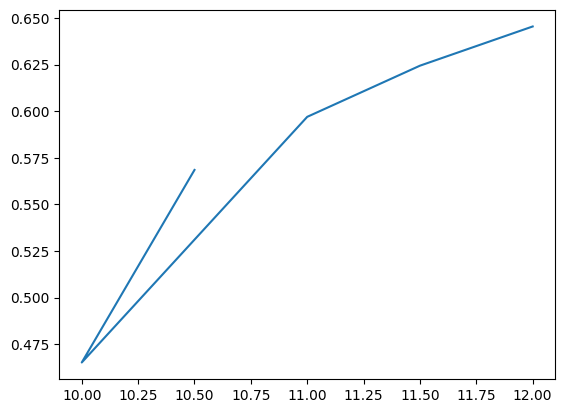

In [18]:
plt.plot(betas,vals)

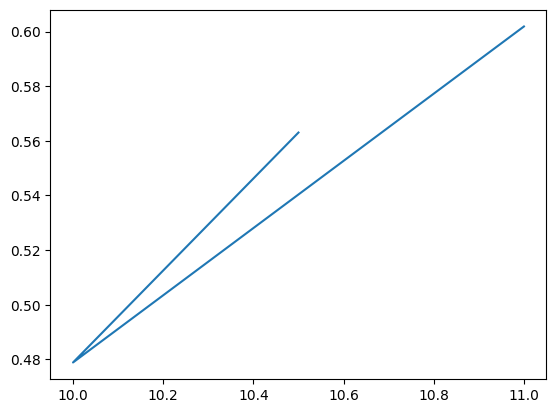

In [19]:
betas=[]
vals=[]
for k,v in db.filter("k0p1500").data.items():
    strTerms=k.split('/')
    beta=float(strTerms[7][4:].replace('p','.'))
    #print(beta,v['fullPlaq'])
    betas.append(beta)
    vals.append(v['fullPlaq']['avg'])#err for err
plt.plot(betas,vals)